# Flipping lightcurves and subtracting them

A way to find any asymmetry in a lightcurve is to flip the lightcurve at some value that represents the middle of the transit (eg: minimum flux), and subtract the two. This should be close to zero where the lightcurve is flat, and spikes/has some peaks wherever there is asymmetry.

In [1]:
import os

os.chdir("../")
import lightkurve as lk
import matplotlib as plt
from analysis_tools_cython import *

In [2]:
plt.rcParams["figure.figsize"] = (10, 6)

In [3]:
data, lc_info = import_lightcurve(
    "betapic/fits/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits"
)

In [4]:
data = lk.search_lightcurve("WASP 100")[1].download()

In [5]:
data.time

<Time object: scale='tdb' format='btjd' value=[1325.34474937 1325.36558298 1325.3864166  ... 1353.11589919 1353.13673265
 1353.15756611]>

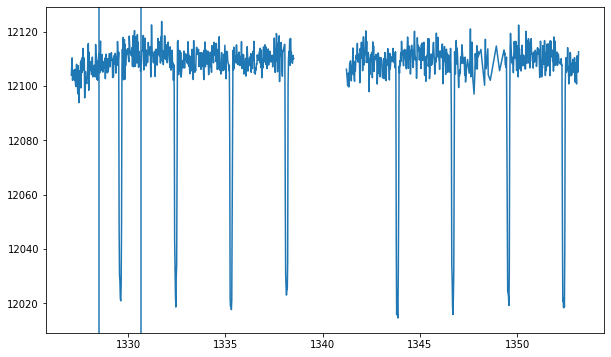

In [6]:
plt.plot(data["time"].value, data["pdcsap_flux"].value)
plt.axvline(data["time"].value[150])
plt.axvline(data["time"].value[250])

---

## Method 1:

In [7]:
time = data["time"][150:250].value
flux = normalise_flux(data["pdcsap_flux"].value)[150:250]

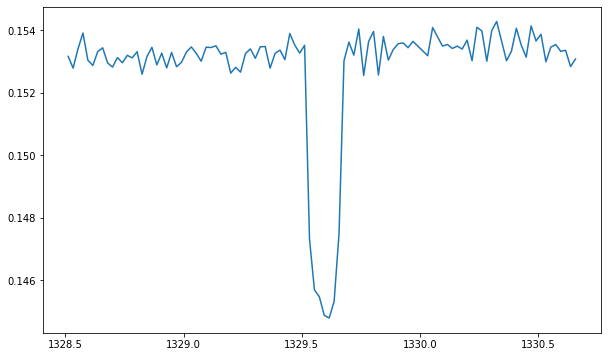

In [8]:
plt.plot(time, flux)
# plt.plot(time[96],flux.min(),'ro')
# plt.plot(time[96:96+len(np.flip(flux[0:96].data))],np.flip(flux[0:96].data))

In [9]:
min_flux_ind = np.argmin(flux)

In [10]:
test_mean = np.mean(flux[min_flux_ind - 2 : min_flux_ind + 2])

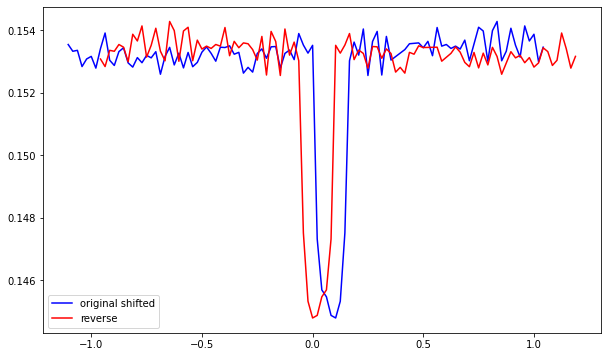

In [11]:
plt.plot(
    time - time[min_flux_ind], np.roll(flux, 5), color="blue", label="original shifted"
)
# plt.plot(time - time[min_flux_ind],flux,color='black',label='original')
plt.plot(time[::-1] - time[np.argmin(flux[::-1])], flux, color="red", label="reverse")
plt.legend()

In [12]:
x_forward = time - time[min_flux_ind]
y_forward = np.roll(flux, 5)

In [13]:
x_backward = (time[::-1] - time[np.argmin(flux[::-1])])[::-1]
y_backward = flux[::-1]

In [14]:
from wotan import flatten

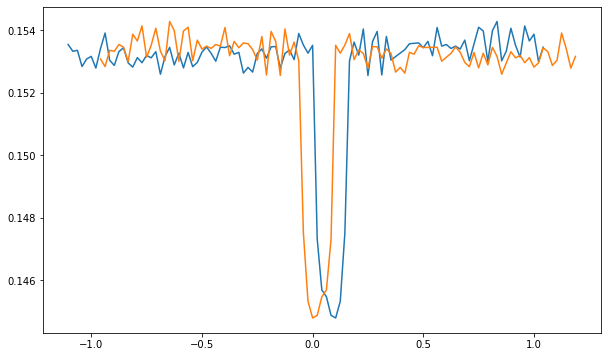

In [15]:
plt.plot(x_forward, y_forward)
plt.plot(x_backward, y_backward)

In [16]:
t = np.linspace(-2, 2, 5000)

In [17]:
diff = np.interp(t, x_forward, y_forward) - np.interp(t, x_backward, y_backward)

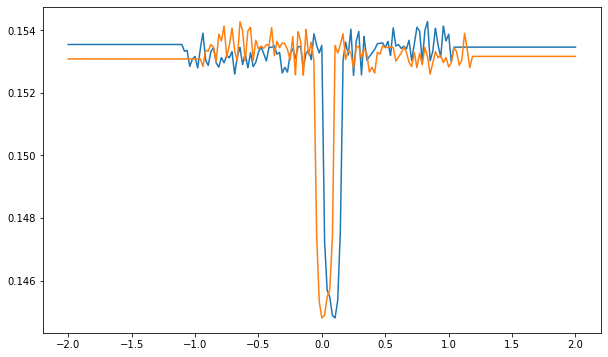

In [18]:
plt.plot(t, np.interp(t, x_forward, y_forward))
plt.plot(t, np.interp(t, x_backward, y_backward))

(0.0, 2.0)

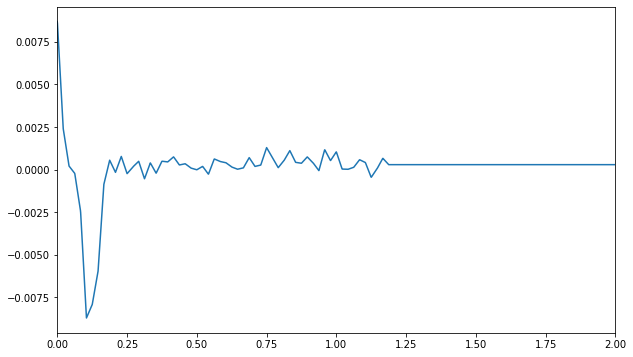

In [19]:
plt.plot(t, diff)
plt.xlim(0, 2)